In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Definição dos parâmetros
num_classes = 5  # Número de classes
x_min, x_max = -1, 1  # Limites do eixo x
y_min, y_max = -1, 1  # Limites do eixo y
num_pontos_por_classe = 1000  # Quantidade de pontos por classe

# Geração de dados
dados = []
for classe in range(num_classes):
    for _ in range(num_pontos_por_classe):
      x = np.random.uniform(x_min, x_max)
      y = np.random.uniform(y_min, y_max)
      dados.append([x, y, classe])






In [6]:
x_min = 0
x_max = 1
y_min = 0
y_max = -1

In [7]:
def ponto_na_intersecao(x, y):
    # Definição dos dois semicírculos
    semicirculo0 = lambda x, y: x**2 + (y+1)**2 <= 1 # Semicírculo 0
    semicirculo1 = lambda x, y: (x+1)**2 + y**2 <= 1 # Semicírculo 1
    semicirculo2 = lambda x, y: x**2 + (y-1)**2 <= 1 # Semicírculo 2
    semicirculo3 = lambda x, y: (x-1)**2 + y**2 <= 1 # Semicírculo 3

    # Verifica se o ponto está dentro de ambos os semicírculos
    if (semicirculo0(x, y) and semicirculo1(x, y)) or (semicirculo1(x, y) and semicirculo2(x, y)) or (semicirculo2(x, y) and semicirculo3(x, y)) or (semicirculo3(x, y) and semicirculo0(x, y)):
        return True
    else:
        return False


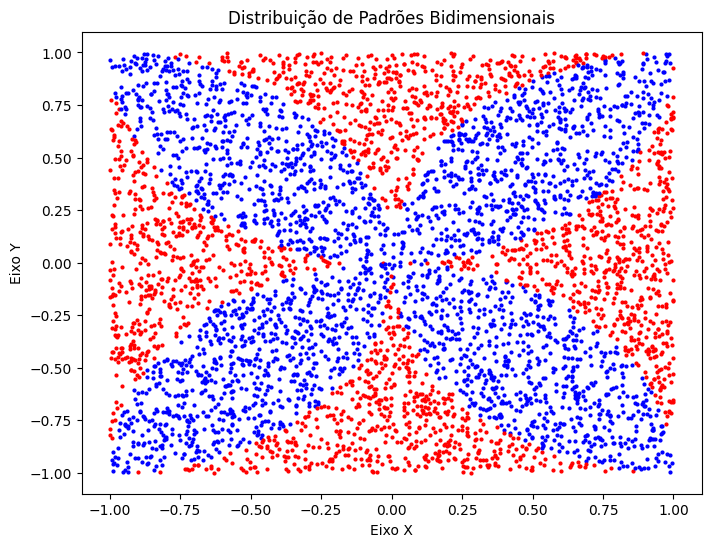

In [15]:
plt.figure(figsize=(8, 6))

for i, ponto in enumerate(dados):
  if ponto_na_intersecao(ponto[0], ponto[1]):
    plt.plot(ponto[0], ponto[1], marker='o', linestyle='', color ='blue', markersize=2)
    ponto[2] = 1
    continue
  plt.plot(ponto[0], ponto[1], marker='o', linestyle='', color ='red', markersize=2)
  ponto[2] = 0

# Definindo o intervalo de theta de 0 a pi (um semicírculo)
theta = np.linspace(0, np.pi, 100)

# Coordenadas x e y do semicírculo centrado em (0, -1)
x0 = np.cos(theta)
y0 = np.sin(theta) - 1  # Shift para baixo por 1 unidade

theta = np.linspace(-np.pi/2, np.pi/2, 100)
x1 = -1 + np.cos(theta)
y1 = np.sin(theta)

theta = np.linspace(0, -np.pi, 100)
x2 =  np.cos(theta)
y2 = np.sin(theta) + 1

theta = np.linspace(np.pi/2, 3*np.pi/2, 100)
x3 =  np.cos(theta)+1
y3 = np.sin(theta)

# Eixos e título
'''plt.plot(x0, y0)
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3, color = 'gray')'''
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.title("Distribuição de Padrões Bidimensionais")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
dados = np.array(dados)
X = dados[:, :2]  # Pega todas as linhas e as duas primeiras colunas (x1, y1)
y = dados[:, 2]   # Pega todas as linhas e a terceira coluna (target)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Preparar os dados:
y_train_cat = to_categorical(y_train, num_classes=2)
y_val_cat = to_categorical(y_val, num_classes=2)

#construir o modelo
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#treinar o modelo
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_val, y_val_cat))

Epoch 1/100
125/125 [==============================] - 2s 5ms/step - loss: 0.6127 - accuracy: 0.7138 - val_loss: 0.4679 - val_accuracy: 0.8660
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.8880 - val_loss: 0.2742 - val_accuracy: 0.9140
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2429 - accuracy: 0.9030 - val_loss: 0.2492 - val_accuracy: 0.9080
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.9137 - val_loss: 0.2226 - val_accuracy: 0.9030
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9222 - val_loss: 0.2292 - val_accuracy: 0.9130
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.1940 - accuracy: 0.9215 - val_loss: 0.2012 - val_accuracy: 0.9300
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 0.1810 - accuracy: 0.9268 - val_loss: 0.2092 - val_accuracy: 0.9280

32/32 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9750
Validation Loss: 0.06283465027809143
Validation Accuracy: 0.9750000238418579
32/32 [==============================] - 0s 2ms/step


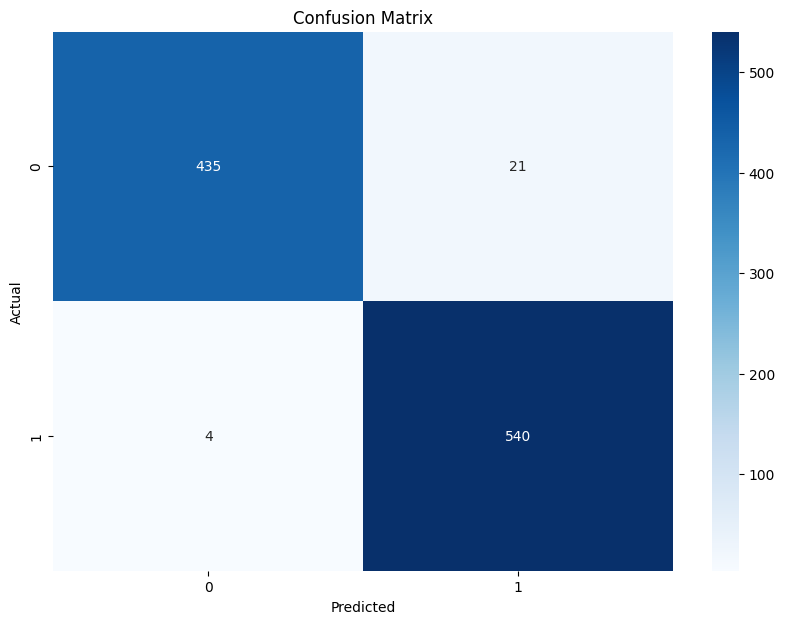

In [11]:
## Avaliar o Desempenho e Calcular a Matriz de Confusão
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_val_pred = np.argmax(model.predict(X_val), axis=1)
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_val)
rf_conf_matrix = confusion_matrix(y_val, rf_y_pred)
print("\nMatriz de Confusão Random Forest:")
print(rf_conf_matrix)


Matriz de Confusão Random Forest:
[[435  21]
 [ 11 533]]


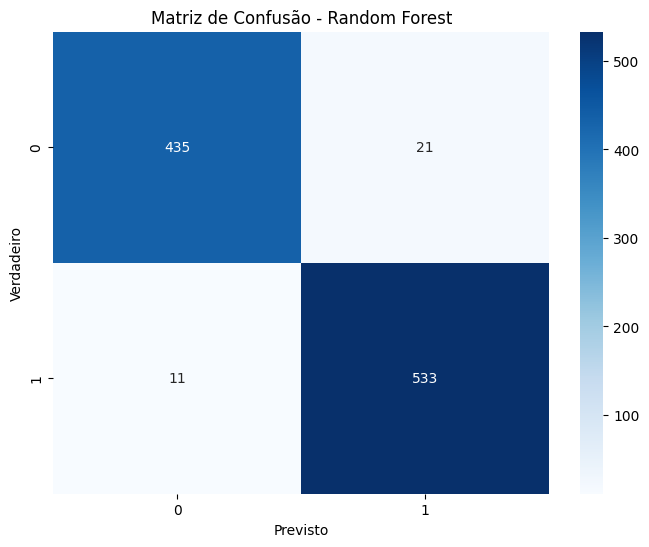

In [14]:
# Plotar a matriz de confusão da Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()